# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Logistica: Lección 3 - Ajuste**

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:


- Realizar el ajuste o ajustes de los modelos
  
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.


In [17]:
# abrimos el dataset
df = pd.read_pickle("datos/invistico_airline_encoding.pkl")
df.sample(5)

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
67071,dissatisfied,1,1,1,2,2,3,1,1,2,2,2,3,2,1,2,3,2,3,0.291667,0.008439,0.583333
84129,satisfied,0,1,1,1,1,3,3,4,3,4,4,4,1,4,5,3,3,4,-0.416667,1.271730,0.500000
76453,dissatisfied,0,1,1,1,3,2,4,5,3,4,3,4,2,4,2,2,2,2,0.833333,1.632068,1.916667
3238,satisfied,0,1,0,2,0,0,0,2,1,2,4,2,3,3,5,3,5,3,0.958333,0.144304,1.916667
30636,satisfied,0,1,0,2,3,2,4,3,3,1,3,1,1,2,3,3,3,2,1.125000,-1.297890,0.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129880 non-null  object  
 1   gender                             129880 non-null  category
 2   customer_type                      129880 non-null  category
 3   type_of_travel                     129880 non-null  category
 4   class                              129880 non-null  category
 5   seat_comfort                       129880 non-null  int64   
 6   departure_arrival_time_convenient  129880 non-null  int64   
 7   food_and_drink                     129880 non-null  int64   
 8   gate_location                      129880 non-null  category
 9   inflight_wifi_service              129880 non-null  int64   
 10  inflight_entertainment             129880 non-null  int64   
 11  online_support            

In [18]:
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
type_of_travel                       0
class                                0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
age                                  0
flight_distance                      0
departure_delay_in_minutes           0
dtype: int64

In [19]:
# separamos los datos en X e y

X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [20]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [21]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [26]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
21413,satisfied,satisfied,Train
7284,dissatisfied,dissatisfied,Train
86080,dissatisfied,dissatisfied,Train
59842,dissatisfied,dissatisfied,Train
69486,dissatisfied,dissatisfied,Train


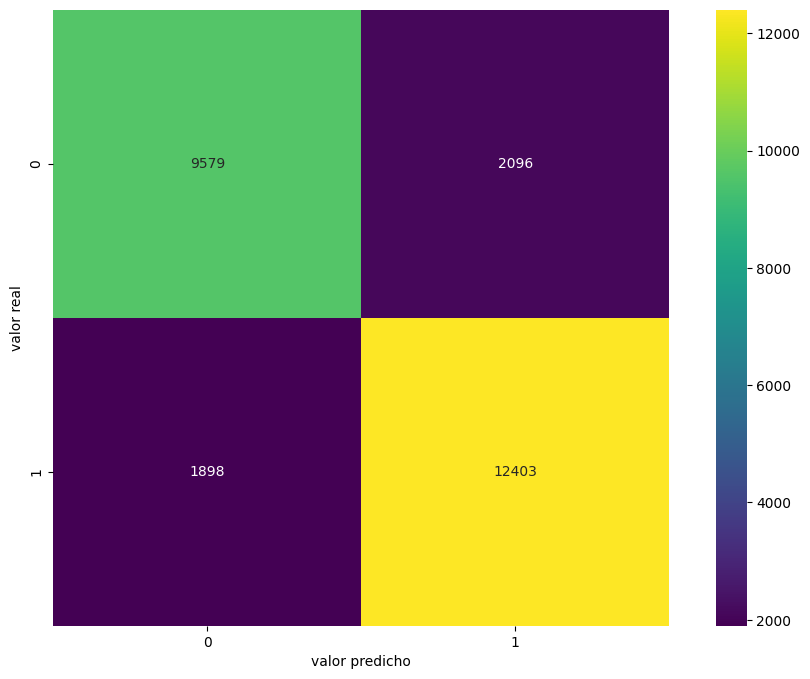

In [27]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

- Tenemos 9579 VN, que corresponden a los pasajeros insatisfechos que el modelo los ha predicho insatisfechos;
- Tenemos 2096 FP, que corresponden a los pasajeros insatisfechos que el modelo los ha predicho satisfechos;
- Tenemos 1898 FN, que corresponden a los pasajeros satisfechos que el modelo los ha predicho insatisfechos;
- Tenemos 12403 VP, que corresponden a los pasajeros satisfechos que el modelo los ha predicho satisfechos.

